### 📘 Hypothesis Testing in Python – A Complete Walkthrough

## 1. What is Hypothesis Testing?

In statistics, **hypothesis testing** is a method to make inferences about a population based on sample data.

* **Null Hypothesis (H₀):** Assumes no effect or no difference.
* **Alternative Hypothesis (H₁ or Ha):** What you want to prove — assumes a significant effect or difference.

### Steps in Hypothesis Testing:

1. Define H₀ and H₁.
2. Choose a significance level (α, typically 0.05).
3. Select an appropriate test (t-test, chi-square, etc.).
4. Calculate the test statistic and p-value.
5. Compare the p-value with α.
6. Conclude (Reject or Fail to Reject H₀).

---

## 2. Types of Hypothesis Tests

| Test                  | When to Use                                      |
| --------------------- | ------------------------------------------------ |
| **One-sample t-test** | Compare sample mean to a known value             |
| **Two-sample t-test** | Compare means of two independent groups          |
| **Paired t-test**     | Compare means of same group at two times         |
| **Chi-square test**   | Test relationships between categorical variables |
| **ANOVA**             | Compare means of more than two groups            |

---

## 3. Example 1 – One Sample t-test

Let’s test if the average height of students is significantly different from 170 cm.

In [1]:
import numpy as np
from scipy import stats

In [2]:
# Sample height data (in cm)
heights = [168, 170, 172, 171, 169, 167, 173, 175, 174, 166]

In [3]:
# H₀: μ = 170
# H₁: μ ≠ 170

In [4]:
# One sample t-test
t_stat, p_val = stats.ttest_1samp(heights, 170)

In [5]:
print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_val, 3))

t-statistic: 0.522
p-value: 0.614


In [6]:
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis – the mean height is significantly different from 170 cm.")
else:
    print("Fail to reject the null – no significant difference.")

Fail to reject the null – no significant difference.


## 4. Example 2 – Two Sample t-test

Let's test if the average scores of students in two classes differ.

In [7]:
# Class A and Class B test scores
class_A = [85, 87, 86, 88, 84, 85, 89, 90]
class_B = [80, 82, 81, 83, 79, 78, 82, 81]

In [8]:
# H₀: μA = μB
# H₁: μA ≠ μB

In [9]:
t_stat, p_val = stats.ttest_ind(class_A, class_B)

In [10]:
print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_val, 3))

t-statistic: 6.287
p-value: 0.0


In [11]:
if p_val < alpha:
    print("Reject the null hypothesis – the two classes have significantly different average scores.")
else:
    print("Fail to reject the null – no significant difference in average scores.")

Reject the null hypothesis – the two classes have significantly different average scores.


## 5. Example 3 – Paired t-test

Before and after training test scores of the same group.



In [12]:
# Before and after scores
before = [70, 72, 68, 65, 74, 71, 69]
after = [75, 74, 70, 67, 78, 73, 72]

In [13]:
# H₀: μdiff = 0
# H₁: μdiff ≠ 0

In [14]:
t_stat, p_val = stats.ttest_rel(before, after)

In [15]:
print("t-statistic:", round(t_stat, 3))
print("p-value:", round(p_val, 3))

t-statistic: -6.222
p-value: 0.001


In [16]:
if p_val < alpha:
    print("Reject the null – training significantly improved scores.")
else:
    print("Fail to reject the null – no significant improvement.")

Reject the null – training significantly improved scores.


## 6. Example 4 – Chi-Square Test for Independence

Do gender and preferred learning style relate?

In [17]:
import pandas as pd
from scipy.stats import chi2_contingency

In [18]:
# Contingency table: Gender vs Learning Style
data = pd.DataFrame({
    'Visual': [30, 25],  # Male, Female
    'Auditory': [20, 30],
    'Kinesthetic': [10, 15]
}, index=['Male', 'Female'])

In [19]:
# Chi-square test
chi2, p, dof, expected = chi2_contingency(data)

In [20]:
print("Chi-square Statistic:", round(chi2, 3))
print("p-value:", round(p, 3))

Chi-square Statistic: 2.701
p-value: 0.259


In [21]:
if p < alpha:
    print("Reject the null – gender and learning style are related.")
else:
    print("Fail to reject the null – no relationship.")

Fail to reject the null – no relationship.


## 7. Visualize p-value Distribution

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Simulated normal distributions under H0 and H1
x = np.linspace(-4, 4, 1000)
h0 = stats.norm.pdf(x, 0, 1)
h1 = stats.norm.pdf(x, 1, 1)

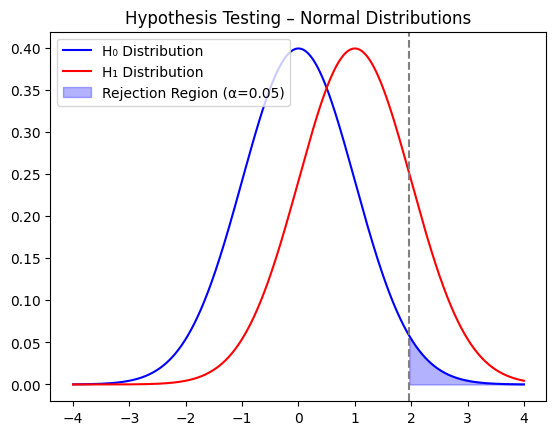

In [24]:
plt.plot(x, h0, label='H₀ Distribution', color='blue')
plt.plot(x, h1, label='H₁ Distribution', color='red')
plt.fill_between(x, 0, h0, where=(x > 1.96), color='blue', alpha=0.3, label='Rejection Region (α=0.05)')
plt.axvline(1.96, linestyle='--', color='gray')
plt.title("Hypothesis Testing – Normal Distributions")
plt.legend()
plt.show()

## 8. F-Test – Comparing Two Variances

Used to test whether **two populations have equal variances**.

### Example: Variance in scores of two teaching methods



In [25]:
import numpy as np
from scipy.stats import f

In [26]:
# Scores from two teaching methods
method1 = [85, 87, 90, 88, 86]
method2 = [78, 75, 77, 80, 82]

In [27]:
# Calculate sample variances
var1 = np.var(method1, ddof=1)
var2 = np.var(method2, ddof=1)

In [28]:
# F-statistic: Larger variance / Smaller variance
f_stat = max(var1, var2) / min(var1, var2)

In [29]:
# Degrees of freedom
df1 = len(method1) - 1
df2 = len(method2) - 1

In [30]:
# p-value (two-tailed)
p_value = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))

In [31]:
print("F-statistic:", round(f_stat, 3))
print("p-value:", round(p_value, 3))

F-statistic: 1.973
p-value: 0.527


In [32]:
alpha = 0.05
if p_value < alpha:
    print("Reject H₀ – Variances are significantly different.")
else:
    print("Fail to reject H₀ – No significant difference in variances.")

Fail to reject H₀ – No significant difference in variances.


## 9. One-Way ANOVA – Comparing Means of 3+ Groups

Used when comparing **one independent variable with 3 or more groups**.

### Example: Exam scores of 3 classes


In [33]:
from scipy.stats import f_oneway

In [34]:
class_A = [88, 92, 85, 90, 87]
class_B = [78, 75, 80, 82, 79]
class_C = [90, 88, 92, 94, 91]

In [35]:
# H₀: All group means are equal
# H₁: At least one group mean is different

In [36]:
f_stat, p_val = f_oneway(class_A, class_B, class_C)

In [37]:
print("F-statistic:", round(f_stat, 3))
print("p-value:", round(p_val, 3))

F-statistic: 32.6
p-value: 0.0


In [38]:
if p_val < alpha:
    print("Reject H₀ – At least one class has a different mean score.")
else:
    print("Fail to reject H₀ – No significant difference among class means.")

Reject H₀ – At least one class has a different mean score.


## 10. Two-Way ANOVA – With Interaction Effect

Used when studying **two categorical independent variables** and **one numerical dependent variable**.

### Example: Does test score depend on `teaching method` and `gender`?



In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
# Sample data
data = pd.DataFrame({
    'score': [80, 82, 84, 78, 75, 77, 90, 92, 89, 85, 88, 87],
    'method': ['A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B'],
    'gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']
})

In [41]:
# Two-way ANOVA with interaction
model = ols('score ~ C(method) + C(gender) + C(method):C(gender)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [42]:
print(anova_table)

                         sum_sq   df         F    PR(>F)
C(method)             60.166667  1.0  1.756691  0.221637
C(gender)              1.500000  1.0  0.043796  0.839465
C(method):C(gender)    0.666667  1.0  0.019465  0.892491
Residual             274.000000  8.0       NaN       NaN


* `C(method)`: main effect of teaching method
* `C(gender)`: main effect of gender
* `C(method):C(gender)`: interaction effect



## ✅ Summary Table of Tests

| Test              | Use Case                                                  |
| ----------------- | --------------------------------------------------------- |
| Hypothesis Testing | Test assumptions about populations using sample data |
| p-value            | Small p → evidence against H₀                        |
| α (alpha)          | Significance level, often 0.05                       |
| Common Tests       | t-test, paired t-test, chi-square, ANOVA             |
| **t-tests**       | Compare means (1 or 2 groups)                             |
| **Chi-square**    | Compare proportions (categorical)                         |
| **F-test**        | Compare two variances                                     |
| **One-Way ANOVA** | Compare >2 group means (one factor)                       |
| **Two-Way ANOVA** | Compare means for two independent variables + interaction |
